Agricultural Data Analysis

This dataset is useful for precision agriculture, which is a modern farming approach. It helps farmers make informed decisions about their farming strategies. The dataset provides data that can be used to build models to advise farmers on the best crops to grow in specific conditions.

Background: The data in this set was compiled by combining information from different sources related to rainfall, climate, and fertilizer use in India.

Data Details:

N: This represents the amount of Nitrogen in the soil.
P: This is the amount of Phosphorous in the soil.
K: This shows the amount of Potassium in the soil.
Temperature: This is measured in degrees Celsius.
Humidity: This is the relative humidity in percentage.
pH: This is the pH value of the soil, showing how acidic or alkaline it is.
Rainfall: This is the amount of rainfall measured in millimeters.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [ ]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.select_dtypes(include=['int64', 'float64']).describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Nutrient Levels: The levels of nutrients like Nitrogen (N), Phosphorus (P), and Potassium (K) vary widely, indicating a diverse range of crop nutrient requirements.

Temperature: The dataset shows a temperature range from 8.83°C to 43.68°C, indicating it covers a broad spectrum of climatic conditions.

Humidity: Humidity in the dataset varies between 14.26% and 99.98%, signifying a wide array of environmental conditions.

pH Levels: pH levels range from 3.50 to 9.94, encompassing conditions from acidic to alkaline soil types.

Rainfall: Rainfall measurements vary from 20.21 mm to 298.56 mm, suggesting the dataset includes crops with diverse water requirements.

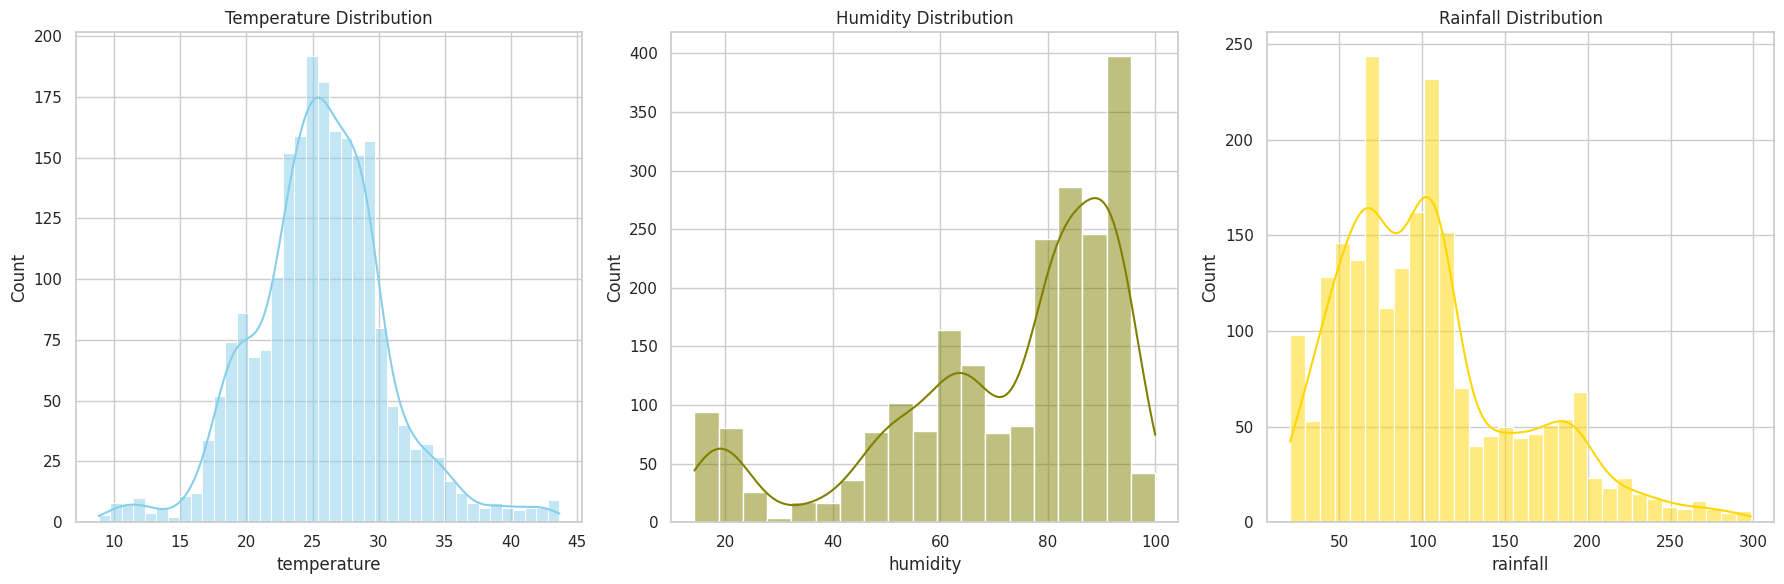

In [ ]:
sns.set(style="whitegrid")

# Creating visualizations for Temperature, Humidity, and Rainfall
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Temperature Distribution
sns.histplot(df['temperature'], kde=True, color="skyblue", ax=axes[0])
axes[0].set_title('Temperature Distribution')

# Humidity Distribution
sns.histplot(df['humidity'], kde=True, color="olive", ax=axes[1])
axes[1].set_title('Humidity Distribution')

# Rainfall Distribution
sns.histplot(df['rainfall'], kde=True, color="gold", ax=axes[2])
axes[2].set_title('Rainfall Distribution')

plt.tight_layout()
plt.show()

In [ ]:
# Define crop_types based on your DataFrame 'df'
crop_types = df['label'].unique()

# Preparing a list of humidity values for each crop type
humidity_lists = [df[df['label'] == crop]['humidity'] for crop in crop_types]

# Performing the ANOVA test for humidity
anova_result_humidity = f_oneway(*humidity_lists)

anova_result_humidity

F_onewayResult(statistic=3103.708891217461, pvalue=0.0)

ANOVA Analysis for rainfall:
The F-Statistic is 3103.71, which indicates a significant variance ratio between the different crops' humidity levels.

The P-Value is 0.0, which is extremely small.